In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
#CSN_path = './'
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

#CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list
CSN_test = CSN_hold_1[-tsize1:] # assign that 20 data examples whcih we will use later

CSN_new_err = CSN_test['Error']

In [3]:
#This is ReLU machine one 186-20 only for k=4 but 1000 epochs and 25 batchsize, ran the machine for 100 times.This was done to compare againts the 3/4 fraction code
out6 = np.load('Data/zz3_4_L.pkl', allow_pickle=True)
#This is ReLU machine one 186-20 only for k=4 but 1000 epochs and 25 batchsize, ran the machine for 25 times.This was done to compare againts the 3/4 fraction code
out7 = np.load('Data/zz3_4_L25.pkl', allow_pickle=True)

#This is Elu Elu ReLU machine one 186-20 only for k=4 but 1000 epochs and 25 batchsize, ran the machine for 100 times.This was done to compare againts the 3/4 fraction code
out8 = np.load('Data/zz3_4a_L.pkl', allow_pickle=True)
#This is Elu Elu ReLU machine one 186-20 only for k=4 but 1000 epochs and 25 batchsize, ran the machine for 25 times.This was done to compare againts the 3/4 fraction code
out9 = np.load('Data/zz3_4a_L_25.pkl', allow_pickle=True)



0.29667136220938056
0.23535174447582052
0.03649368411225029
0.10443992069709673
0.27421368341474367
0.12153477163400672
0.15081227962337085
0.2595765936342894
0.24078352676964154
0.4003272629217889
0.06924293097904166
0.15168092609554507
0.9056866721751026
0.26735572603544866
0.170203142756845
0.21854748441332406
0.17932902819024055
0.9311538771372174
0.07510806034466966
0.058347130606291986


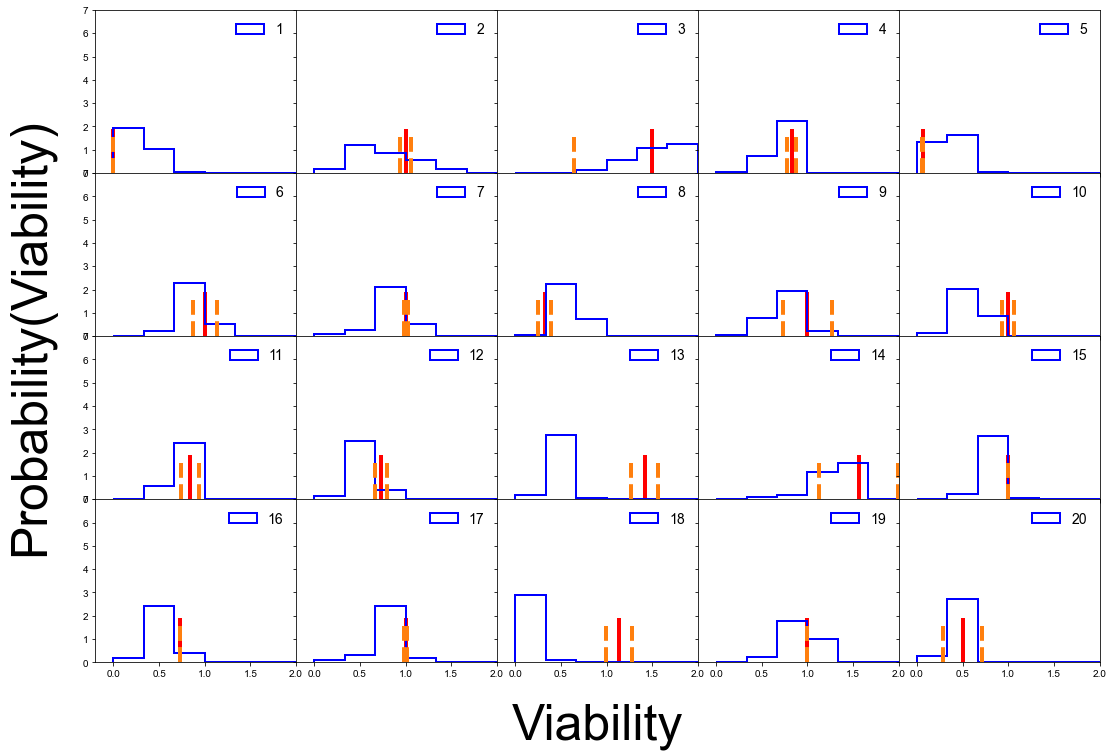

In [4]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out6[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out6[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [5]:
   a_list =[]
b_list =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out6[:, 0, 0, i])
            b_list.append(M)

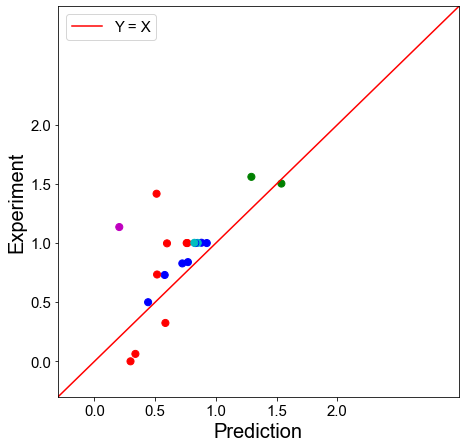

In [6]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [7]:
n = 100

In [8]:
[np.average(np.abs(out6[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values)) for i in np.arange(1)]

[0.28054144758212485]

In [9]:
[np.std(np.abs(out6[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(1)]

[0.02693465297150226]

0.2761640816330784
0.22083393307993704
0.08153888065256498
0.09198411087704017
0.2933648637940625
0.10114284417530117
0.12433547233833964
0.2612172408874246
0.20142899664945602
0.3914462758574907
0.05555212373501095
0.12529567960817156
0.8946936888867106
0.24828841584497607
0.15273142467352596
0.18868376949227117
0.1424885733576906
0.9303328663268046
0.04031950756910485
0.046706287313101724


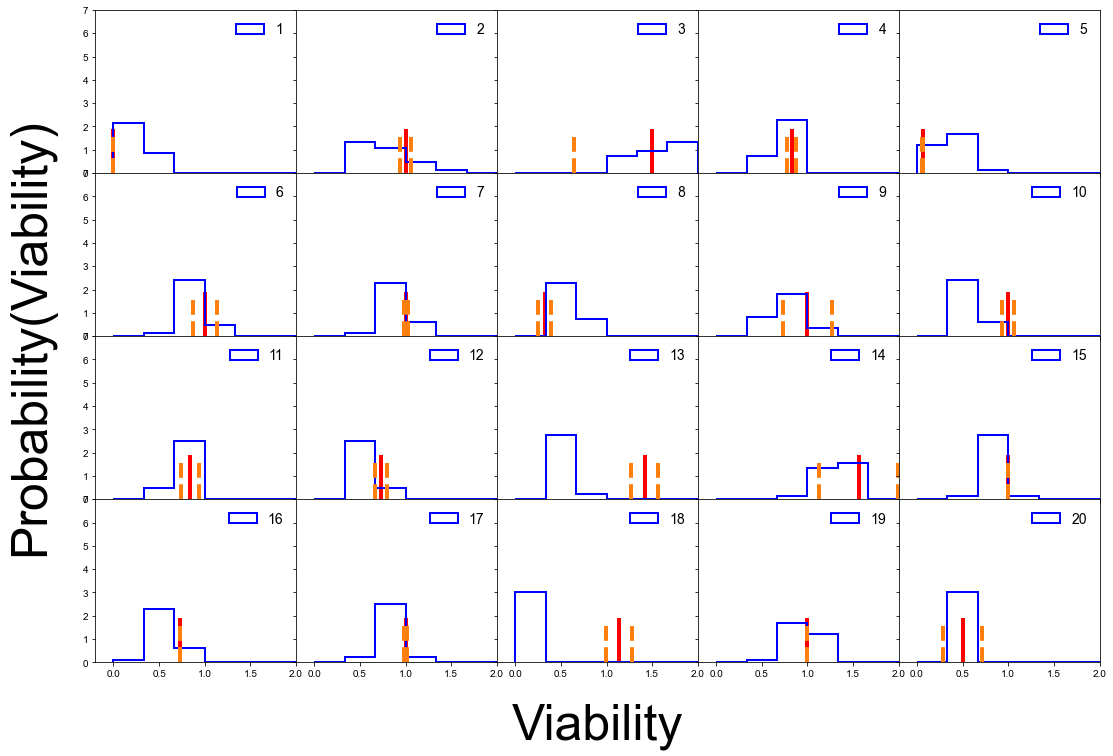

In [10]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out7[:, 0, 0, i])
    ####variance= np.var(out7[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out7[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out7[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out7[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out7[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out7[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [11]:
   a_list2 =[]
b_list2 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list2.append(x2)
    
            M =np.mean(out7[:, 0, 0, i])
            b_list2.append(M)

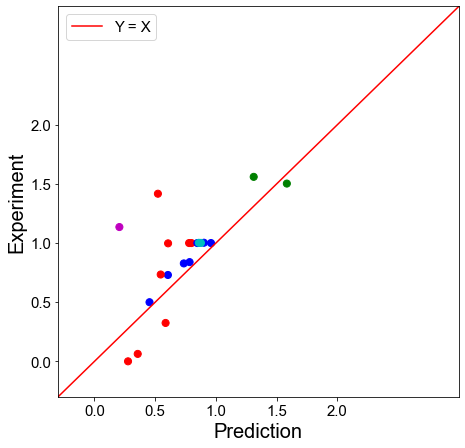

In [12]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list2, a_list2, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [13]:
n = 25
[np.average(np.abs(out7[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values)) for i in np.arange(1)]

[0.26714597677108265]

In [14]:
[np.std(np.abs(out7[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(1)]

[0.05158515918822226]

0.22052148594614163
0.44808030462354553
0.10656918708603369
0.10543724214245231
0.1782072865454829
0.0916333129333533
0.2262983980164639
0.1170210370540875
0.16757979925479694
0.2726932169120361
0.04253623835827658
0.026238813110859516
0.8604363547815472
0.42122852838011826
0.16267179005621568
0.07598720871409148
0.2831092205053952
1.0066040148990048
0.0508388596906727
0.025650657141953193


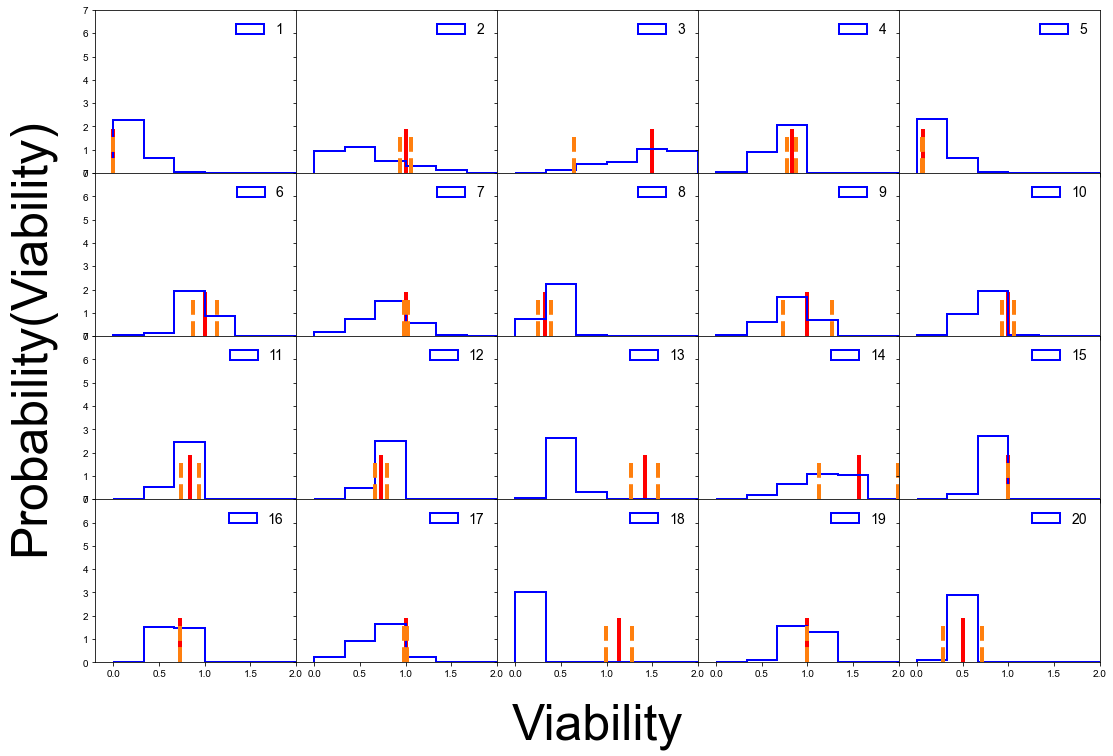

In [15]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out8[:, 0, 0, i])
    ####variance= np.var(out8[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out8[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out8[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out8[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out8[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out8[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [16]:
   a_list3 =[]
b_list3 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list3.append(x2)
    
            M =np.mean(out8[:, 0, 0, i])
            b_list3.append(M)

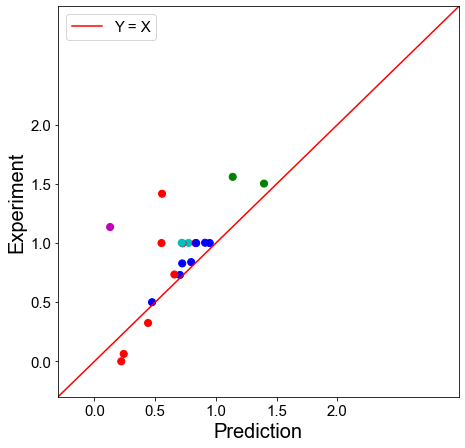

In [17]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list3, a_list3, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [18]:
n = 100
[np.average(np.abs(out8[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values)) for i in np.arange(1)]

[0.27654590118346806]

In [19]:
[np.std(np.abs(out8[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(1)]

[0.02982482479252983]

0.2581248126387193
0.36330131365657414
0.18488121810036606
0.09836674792608835
0.21536966054939638
0.0343765281145586
0.2506392853824271
0.1326511634131678
0.15762832430124174
0.3163590902853942
0.03644737981330459
0.022233295471461578
0.8916740602101229
0.5001936433424534
0.1914155556142022
0.06351876318638716
0.3027793827398195
1.0103818000581462
0.0726668596665988
0.010318881833722426


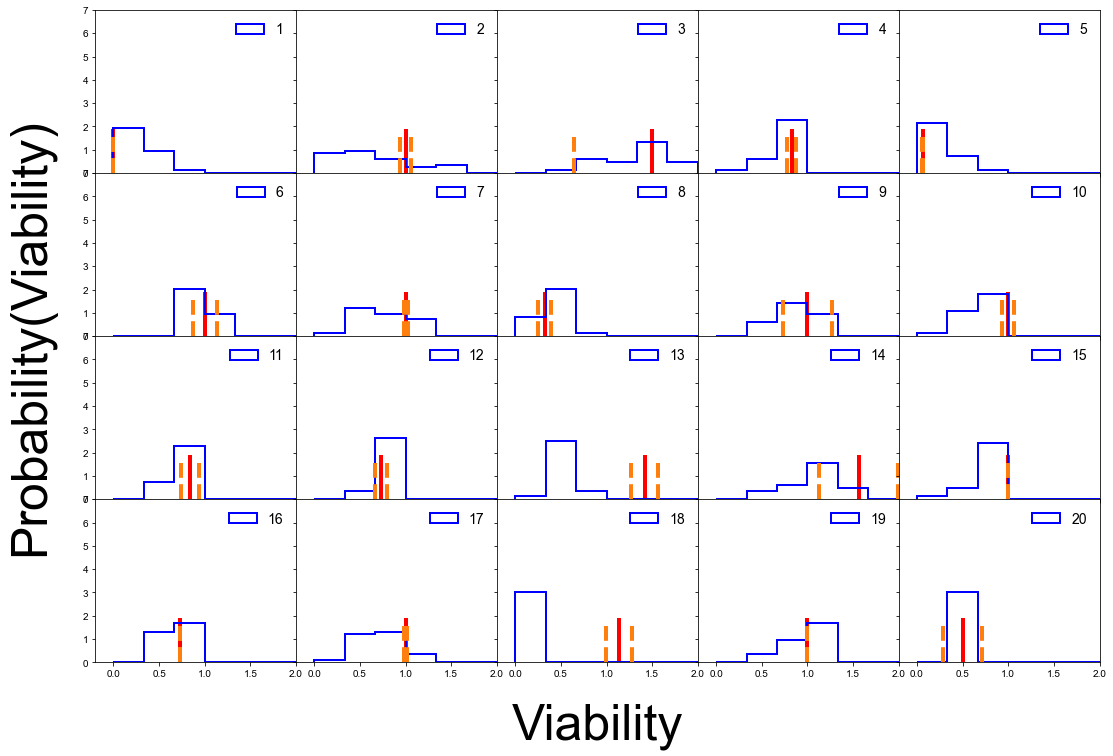

In [20]:
fig_new_dat, axes = plt.subplots(4, 5, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(20):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_test['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_test['Viability Fraction ']][i]
    #std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out9[:, 0, 0, i])
    ####variance= np.var(out9[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out9[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out9[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out9[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out9[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 2.0])
    axes[i].hist(out9[:, 0, 0, i], bins=6, range=(0, 2.0), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [21]:
   a_list4 =[]
b_list4 =[]
for i in np.arange(20):
            x2 = [i for i in CSN_test['Viability Fraction ']][i]
 
            a_list4.append(x2)
    
            M =np.mean(out9[:, 0, 0, i])
            b_list4.append(M)

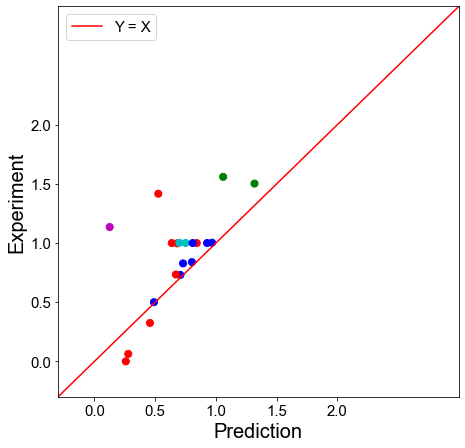

In [22]:
categories = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap = np.array(['r', 'g', 'b', 'c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list4, a_list4, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

In [23]:
n = 25
[np.average(np.abs(out9[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values)) for i in np.arange(1)]

[0.28718799021054714]

In [24]:
[np.std(np.abs(out9[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(1)]

[0.062080830738276194]

In [25]:
######This is the stacked plots

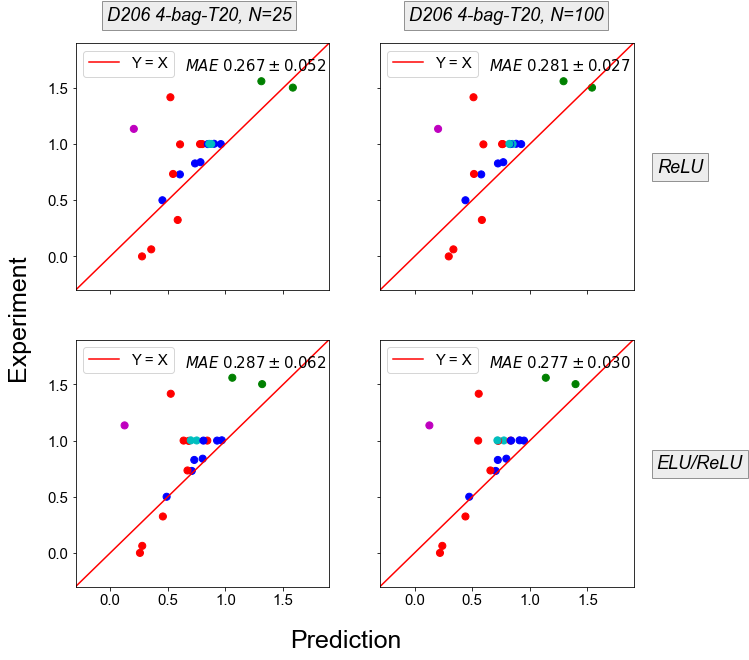

In [87]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))


fig.text(0.5, 0.04, 'Prediction', ha='center', fontsize=25)
fig.text(0.03, 0.5, 'Experiment', va='center', rotation='vertical', fontsize=25)

plt.rc('xtick', labelsize=15)

plt.rc('ytick', labelsize=15)

categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])

categories1 = np.array([0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 3, 4, 2, 2])
colormap1 = np.array(['r', 'g', 'b', 'c', 'm'])


axs[0,0].scatter(b_list2, a_list2, s=50, c=colormap1[categories1])
axs[0,0].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,0].legend(fontsize=15)

axs[0,0].text(-0.03, 2.1, 'D206 4-bag-T20, N=25', fontsize=18, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,0].text(0.65, 1.7, r'$MAE\ 0.267\pm0.052$', fontsize=15, ha='left', va='center')

#axs[0,0].text(1.6, 0.65, '206M-T18', fontsize=28, style='italic',
#        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,0].set_ylim(-0.3, 1.9)
axs[0,0].set_xlim(-0.3, 1.9)


axs[0,1].scatter(b_list, a_list, s=50, c=colormap1[categories1])
axs[0,1].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[0,1].legend(fontsize=15)


axs[0,1].text(-0.05, 2.1, 'D206 4-bag-T20, N=100', fontsize=18, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,1].text(2.1, 0.75, 'ReLU', fontsize=18, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[0,1].text(0.65, 1.7, r'$MAE\ 0.281\pm0.027$', fontsize=15, ha='left', va='center')


axs[0,1].set_ylim(-0.3, 1.9)
axs[0,1].set_xlim(-0.3, 1.9)







axs[1,0].scatter(b_list4, a_list4, s=50, c=colormap1[categories1])
axs[1,0].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,0].legend(fontsize=15)


axs[1,0].text(0.65, 1.7, r'$MAE\ 0.287\pm0.062$', fontsize=15, ha='left', va='center')



axs[1,0].set_ylim(-0.3, 1.9)
axs[1,0].set_xlim(-0.3, 1.9)


axs[1,1].scatter(b_list3, a_list3, s=50, c=colormap1[categories1])
axs[1,1].plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
axs[1,1].legend(fontsize=15)

axs[1,1].text(2.1, 0.75, 'ELU/ReLU', fontsize=18, style='italic',
        bbox={'facecolor': 'lightgrey', 'alpha': 0.4, 'pad': 5})

axs[1,1].text(0.65, 1.7, r'$MAE\ 0.277\pm0.030$', fontsize=15, ha='left', va='center')

axs[1,1].set_ylim(-0.3, 1.9)
axs[1,1].set_xlim(-0.3, 1.9)





plt.savefig('Fig11bNew.pdf', transparent=True, format='pdf', bbox_inches='tight')